# Fundamentals of Machine Learning - Exercise 2
* The aim of the exercise is to learn basic techniques for visualization creation and interpretation using Matplotlib and Seaborn libraries.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_02.png?raw=true)

# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [7]:
df_full = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv')
df_full.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Price is the most interisting attribute in our dataset, let's take a look on its distribution
- SalePrice

## Vizualize house prices in form of histogram
- What does it tell us about the prices?

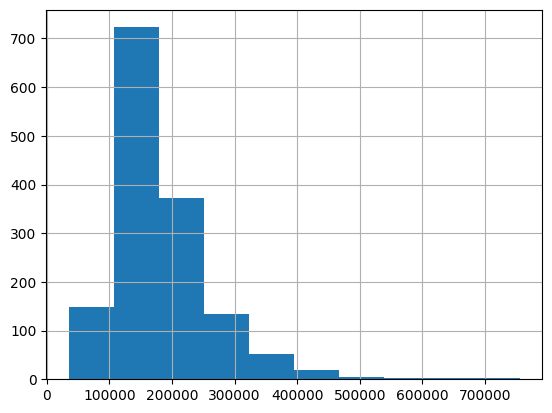

In [8]:
df_full.SalePrice.hist()
plt.show()

### Modify bins
- Perhaps we want to visualize the histogram with more dense or coarse bins
- *bins* attribute

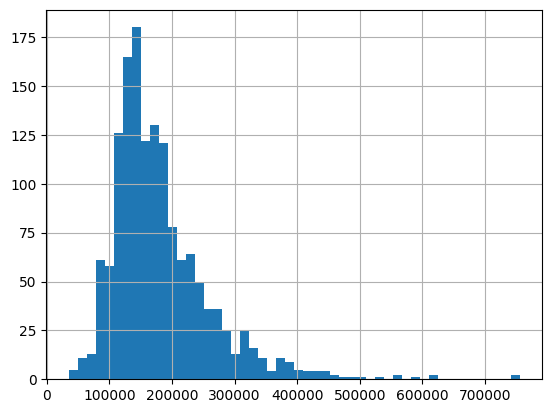

In [9]:
df_full.SalePrice.hist(bins=50)
plt.show()

### Use quartiles (Q1, Q3) for highlighting most common price range in histogram

* Check functions *describe* and *quantile* over price column

In [13]:
df_full.SalePrice.quantile(0.25), df_full.SalePrice.quantile(0.75)

(np.float64(129975.0), np.float64(214000.0))

## 🔎 What can we say about prices based on the quantiles?
### Use function *axvline* from Matplotlib to draw vertical lines at the quartile positions

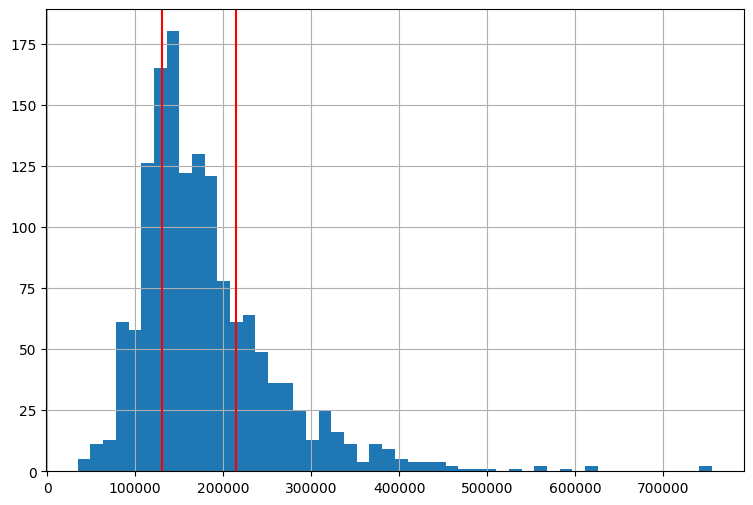

In [15]:
fig = plt.figure(figsize=(9,6))
df_full.SalePrice.hist(bins=50)
plt.axvline(df_full.SalePrice.quantile(0.25), color='red')
plt.axvline(df_full.SalePrice.quantile(0.75), color='red')
plt.show()

## 📊 Let's add more complexity to histogram vizualizations.
### Does price change for different values of GaragaFinish attribute?

### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished
- Unf	Unfinished
- NA	No Garage

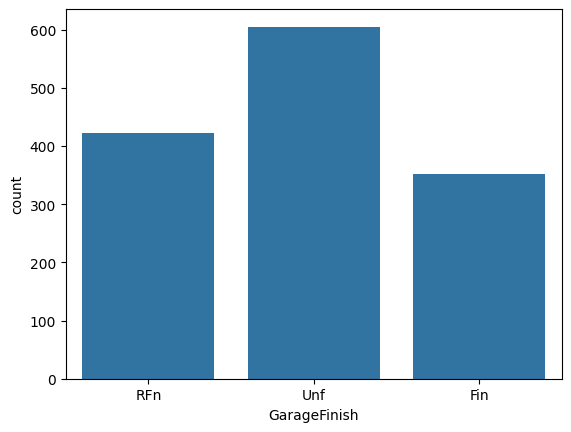

In [16]:
sns.countplot(x='GarageFinish', data=df_full)
plt.show()

### 💡 We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

### Fill nan values with 'NoGarage' string

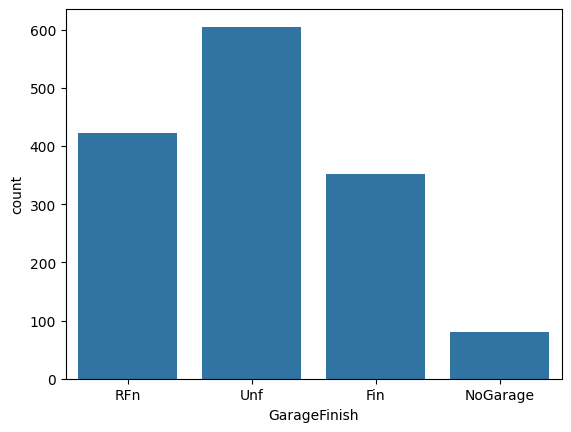

In [17]:
sns.countplot(x='GarageFinish', data=df_full.fillna('NoGarage'))
plt.show()

### Take a look at the histogram again

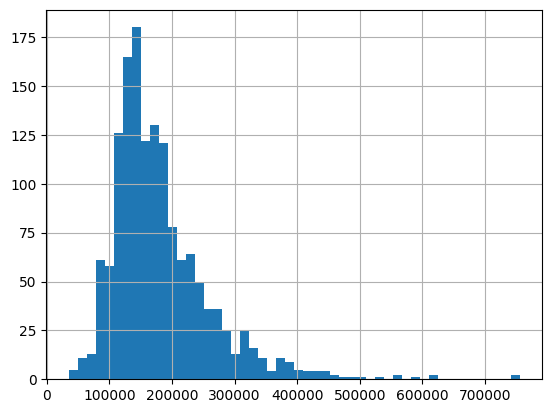

In [18]:
df_full.SalePrice.hist(bins=50)
plt.show()

## 💡 Sometimes the histograms distinguished by colors are not easily redeable
- We can use *col* attribute to automatically plot every histogram on its own canvas

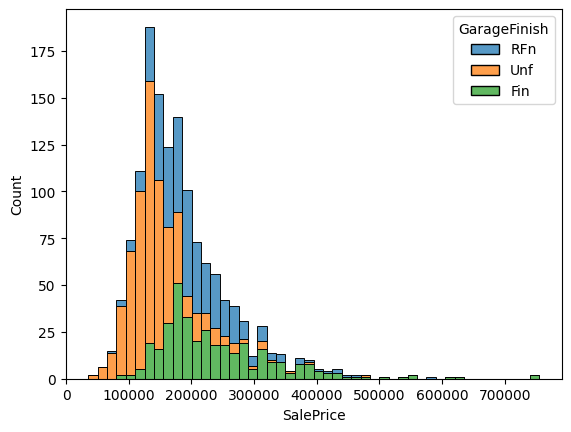

In [19]:
sns.histplot(data=df_full, x='SalePrice', hue='GarageFinish', multiple='stack')
plt.show()

# 📊 Another very useful tecnique for the numerical features distributions are boxplots
- 🔎 Did you see any of these before?

- 🔎 How should we read boxplots?
    - **Quartiles**
    - **Median**
    - Box size
    - **Outliers and IQR**
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

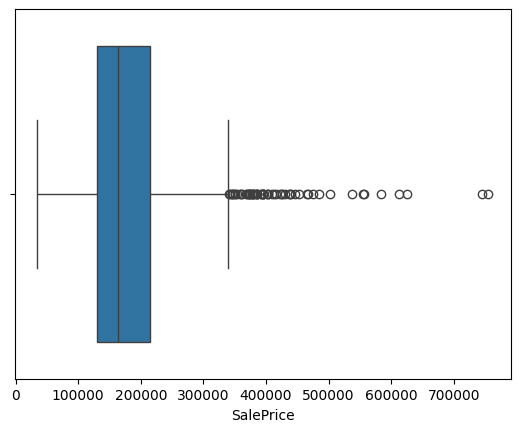

In [20]:
sns.boxplot(x=df_full.SalePrice)
plt.show()

## Let's take a look at the *SalePrice* for different *BldgType* values
- 🔎 What can we say about the prices?

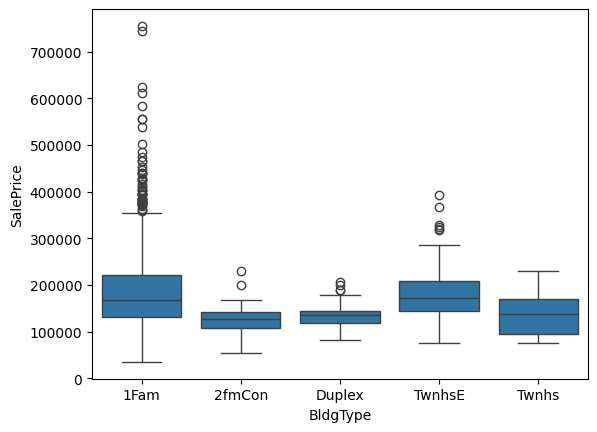

In [21]:
sns.boxplot(x=df_full.BldgType, y=df_full.SalePrice)
plt.show()

## We can do the same for *GrLivArea*

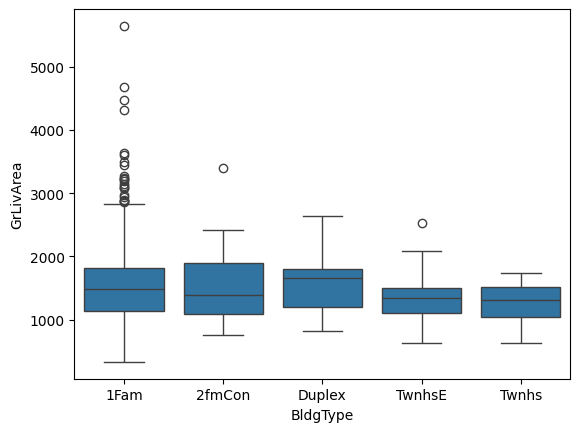

In [22]:
sns.boxplot(x=df_full.BldgType, y=df_full.GrLivArea)
plt.show()

## Let's take a look at the *GrLivArea* for different *BldgType* values
- 🔎 What can we say about the GrLivArea?

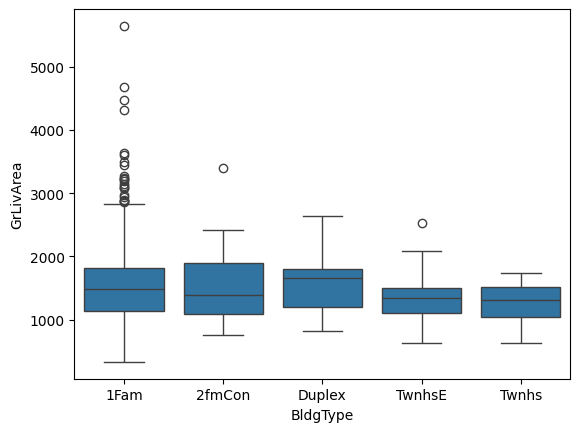

In [24]:
sns.boxplot(x=df_full.BldgType, y=df_full.GrLivArea)
plt.show()

# 📊 Scatter plots are commonly used for visualizing two numerical variables

### We can use standard *scatterplot* with *BldgType* as a *hue* so we can better grasp the relationship between *GrLivArea* and *SalePrice*
* Try to set *alpha* parameter for opacity settings

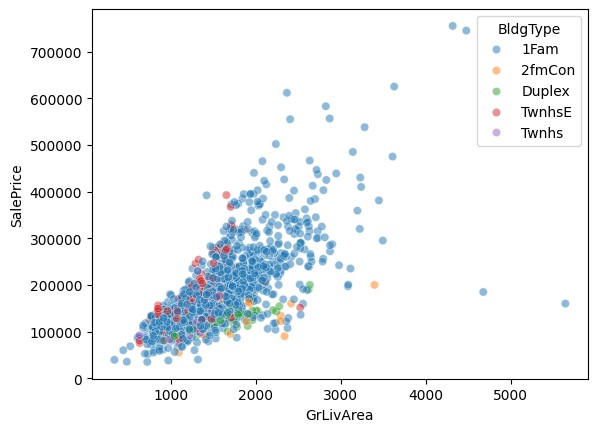

In [25]:
sns.scatterplot(data=df_full, x='GrLivArea', y='SalePrice', hue='BldgType', alpha=0.5)
plt.show()

### We can see there are some outliers in the data, let's zoom only to area without them, how can we filter the data?

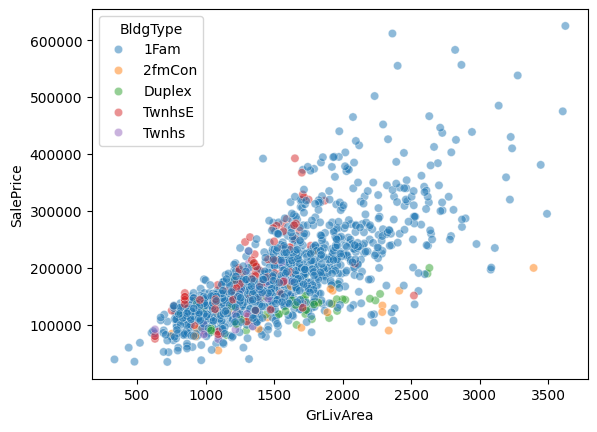

In [26]:
sns.scatterplot(data=df_full[df_full.GrLivArea < 4000], x='GrLivArea', y='SalePrice', hue='BldgType', alpha=0.5)
plt.show()

# We have an information about a month and a year for the sold houses.
## 🔎 Can you vizualize what was the average price of the house by quarters?

* We need to create a new column **YearQuarterSold** with merged Year and Quarter information in this pattern: '2010-1','2010-2' and so on first
    * We can map the values using the *apply* function or use string concatenation directly
* 💡 If you need to change data type of the columns, you can use *astype*

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearQuarterSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2008-1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2007-2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2008-3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008-4


### Compute the average price for the *YearQuarterSold* attribute

In [29]:
df_quarter = df_full.groupby('YearQuarterSold').SalePrice.mean().reset_index()
display(df_quarter)

,YearQuarterSold,SalePrice
0,2006-1,190553.522727
1,2006-2,168277.176991
2,2006-3,191858.980952
3,2006-4,187993.480769
4,2007-1,178489.159091
5,2007-2,174689.232000
6,2007-3,190919.156863
7,2007-4,207781.827586
8,2008-1,173837.951220
9,2008-2,173518.391304


## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

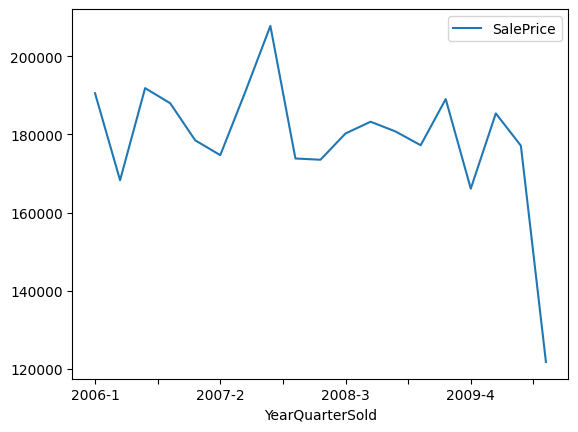

In [30]:
df_quarter.plot.line(x='YearQuarterSold', y='SalePrice')
plt.show()

### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [32]:
df_quarter.groupby('YearQuarterSold').SalePrice.describe().reset_index()

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-1,1.0,190553.522727,NaN,190553.522727,190553.522727,190553.522727,190553.522727,190553.522727
1,2006-2,1.0,168277.176991,NaN,168277.176991,168277.176991,168277.176991,168277.176991,168277.176991
2,2006-3,1.0,191858.980952,NaN,191858.980952,191858.980952,191858.980952,191858.980952,191858.980952
3,2006-4,1.0,187993.480769,NaN,187993.480769,187993.480769,187993.480769,187993.480769,187993.480769
4,2007-1,1.0,178489.159091,NaN,178489.159091,178489.159091,178489.159091,178489.159091,178489.159091
5,2007-2,1.0,174689.232000,NaN,174689.232000,174689.232000,174689.232000,174689.232000,174689.232000
6,2007-3,1.0,190919.156863,NaN,190919.156863,190919.156863,190919.156863,190919.156863,190919.156863
7,2007-4,1.0,207781.827586,NaN,207781.827586,207781.827586,207781.827586,207781.827586,207781.827586
8,2008-1,1.0,173837.951220,NaN,173837.951220,173837.951220,173837.951220,173837.951220,173837.951220
9,2008-2,1.0,173518.391304,NaN,173518.391304,173518.391304,173518.391304,173518.391304,173518.391304


![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_01.png?raw=true)

In [34]:
df_agg = df_quarter.groupby('YearQuarterSold').SalePrice.describe().reset_index()
df_melt = pd.melt(df_agg, id_vars=['YearQuarterSold'], value_vars=['min', 'mean', '50%', 'max'])
df_melt

,YearQuarterSold,variable,value
0,2006-1,min,190553.522727
1,2006-2,min,168277.176991
2,2006-3,min,191858.980952
3,2006-4,min,187993.480769
4,2007-1,min,178489.159091
...,...,...,...
71,2009-3,max,189046.531532
72,2009-4,max,166112.437500
73,2010-1,max,185384.413043
74,2010-2,max,177119.593496


## What can we say about the minimum and maximum values?
- 💡Take a look at std. deviation

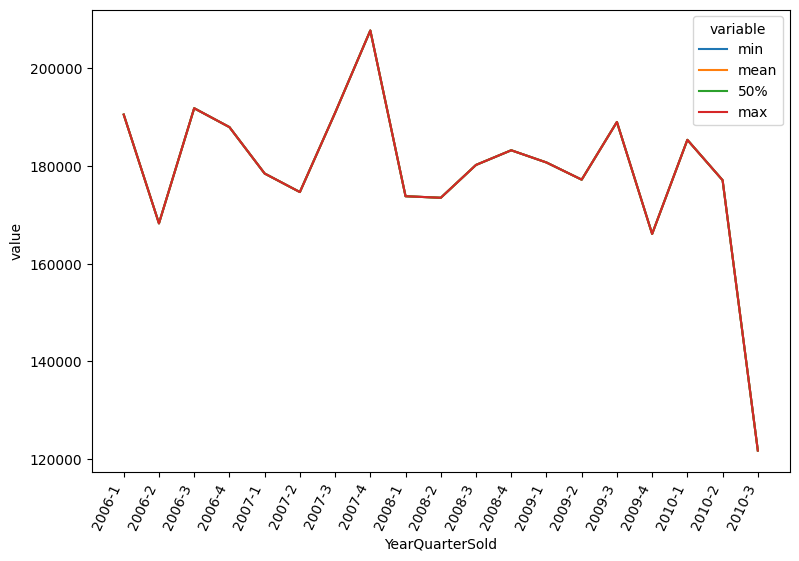

In [35]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_melt, x='YearQuarterSold', y='value', hue='variable')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# We can take a look at number of sold houses for the defined time periods as well
## 📊 We will use standard bar plot
- 🔎 In which quarter were the most houses sold?
- 💡 Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

In [36]:
df_quarter.YearQuarterSold.value_counts()

,count
YearQuarterSold,
2006-1,1
2006-2,1
2006-3,1
2006-4,1
2007-1,1
2007-2,1
2007-3,1
2007-4,1
2008-1,1


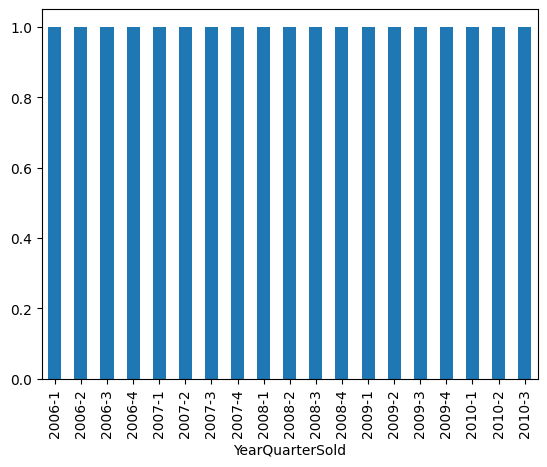

In [37]:
df_quarter.YearQuarterSold.value_counts().plot.bar()
plt.show()

# Tasks (2p)
## ✅ Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- 💡 If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*) 💡

## ✅ Task 2 - Describe what you see in the data (1p)
- Try to vizualize the relationship between *SalePrice* and *OverallQual*
    - 💡You can use BoxPlots, Scatter plots, etc., the choice of a right plot type is up to you 🙂
- Do the same for *SalePrice* and *OverallCond*; i.e. vizualize and describe insight-
- **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
    - ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

### Task 1

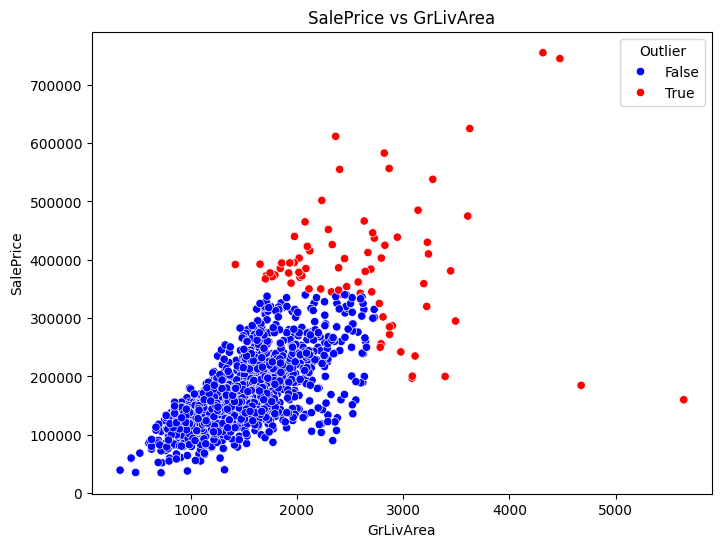

In [43]:
def find_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper


sp_low, sp_high = find_bounds(df_full["SalePrice"])
gr_low, gr_high = find_bounds(df_full["GrLivArea"])


df_full["Outlier"] = (
    (df_full["SalePrice"] < sp_low) | (df_full["SalePrice"] > sp_high) |
    (df_full["GrLivArea"] < gr_low) | (df_full["GrLivArea"] > gr_high)
)


plt.figure(figsize=(8,6))
sns.scatterplot(data=df_full, x="GrLivArea", y="SalePrice", hue="Outlier", palette={True:"red", False:"blue"})
plt.title("SalePrice vs GrLivArea")
plt.show()

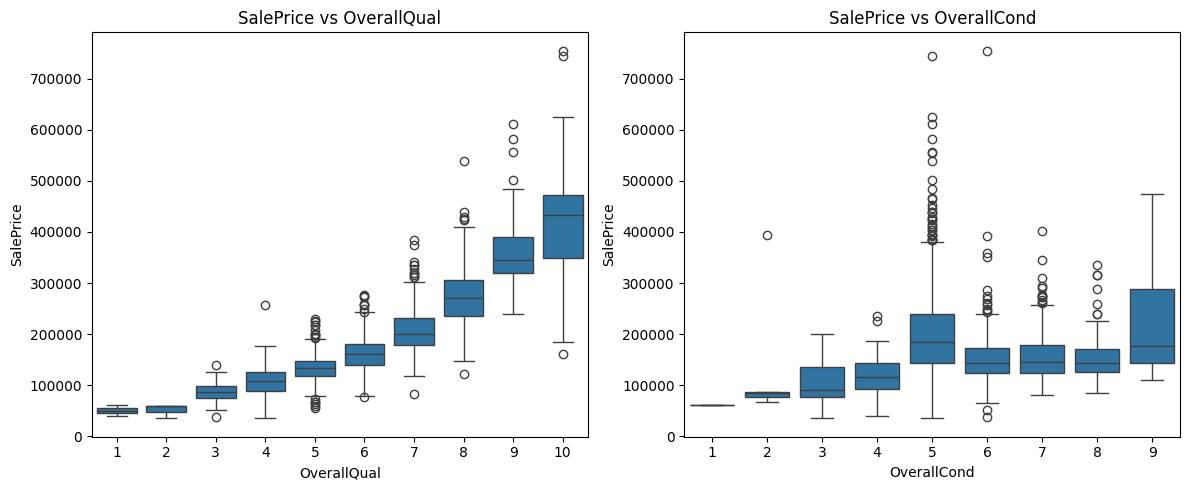

In [44]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_full, x="OverallQual", y="SalePrice")
plt.title("SalePrice vs OverallQual")

plt.subplot(1,2,2)
sns.boxplot(data=df_full, x="OverallCond", y="SalePrice")
plt.title("SalePrice vs OverallCond")

plt.tight_layout()
plt.show()

### Insights

- **SalePrice vs OverallQual**  
  Cena domu roste s vyssi kvalitou, doma s kvalitou napriklad s 8-10 maji vetsi median nez doma s kvalitou 3-4

- **SalePrice vs OverallCond**  
  celkove stav nema velky vliv, rozptyl a rozdil cen je mensi, takze stav domu ma mensi dopad na cenu nez celkove kvalita